In [2]:
def read_file(filepath):
    with open(filepath) as f:
        data = list(
            map(lambda x: eval(x.strip()), f.read().splitlines())
            )
        
        tuples = [(data[i], 0) if i < 124 else (data[i], 1) for i in range(len(data))]
        tuples.sort(reverse=False)
        
    return zip(*tuples)
        

In [145]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Your function to plot ROC curve for each dataset
def roc(data,labels, ax, plot_label, axs=True):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(labels, data)

    # Calculate the Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve on the provided axes (ax)
    if axs:
        ax.plot(fpr, tpr, label=f'{plot_label} (AUC = {roc_auc:.2f})')
        ax.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
        ax.set_xlabel('False Positive Rate (FPR)')
        ax.set_ylabel('True Positive Rate (TPR)')
        ax.set_title(f'ROC Curve {plot_label}')
        ax.legend(loc='lower right')
        ax.grid(True)
        ax.set_aspect('equal', 'box')
    else:
        plt.plot(fpr, tpr, label=f'{plot_label} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier

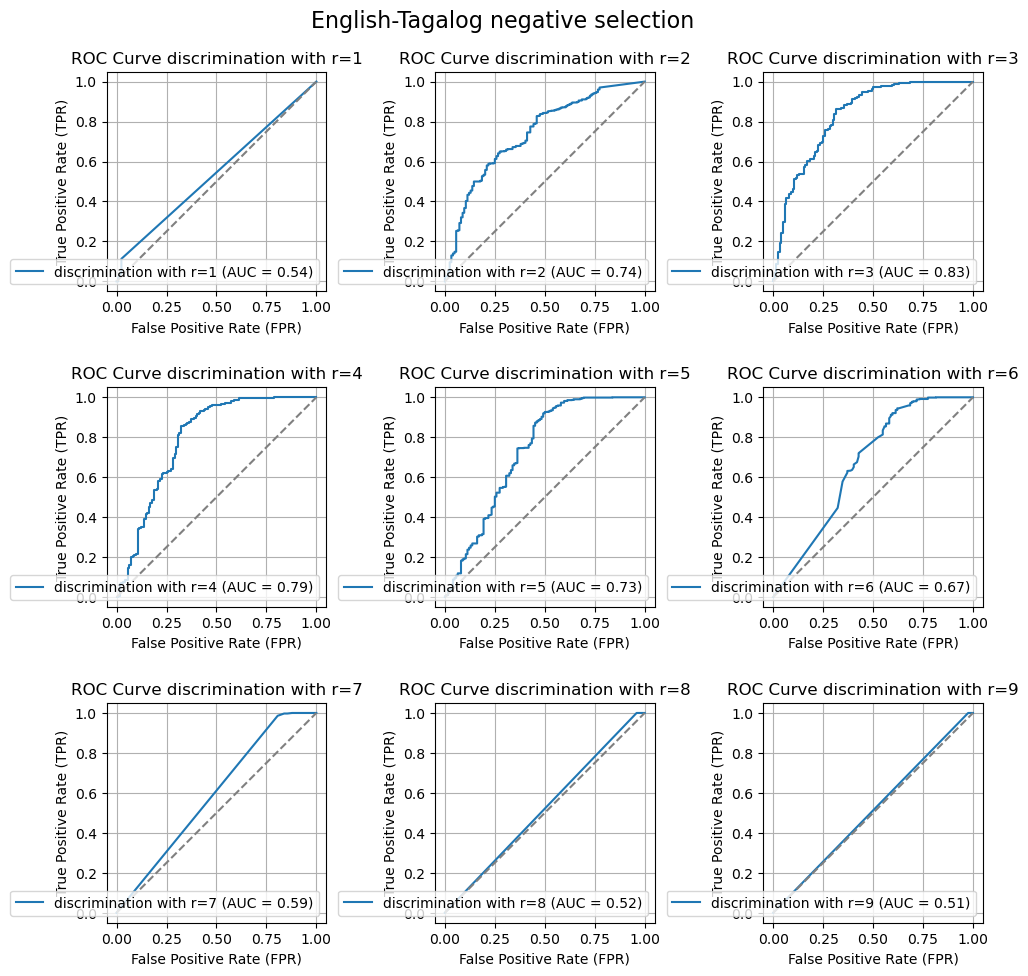

In [176]:
# Create subplots for 8 different ROC curves
fig, axs = plt.subplots(3, 3, figsize=(10, 10))  # 4 rows, 2 columns for 8 subplots
axs = axs.ravel()  # Flatten the 2D array of axes to make it easier to index

# Loop through your files and plot ROC curves in subplots
for n in range(1, 10):
    labels, data = read_file(f"tests/test-english-tagalog-{n}.txt")  # Assuming you have a function to read the files
    roc(labels, data, axs[n-1], f'discrimination with r={n}')  # Plot in the appropriate subplot

# Adjust layout for better spacing between subplots
plt.suptitle('English-Tagalog negative selection', fontsize=16)  # Title above the subplots
plt.tight_layout()
plt.savefig('figures/eng-tag.png')

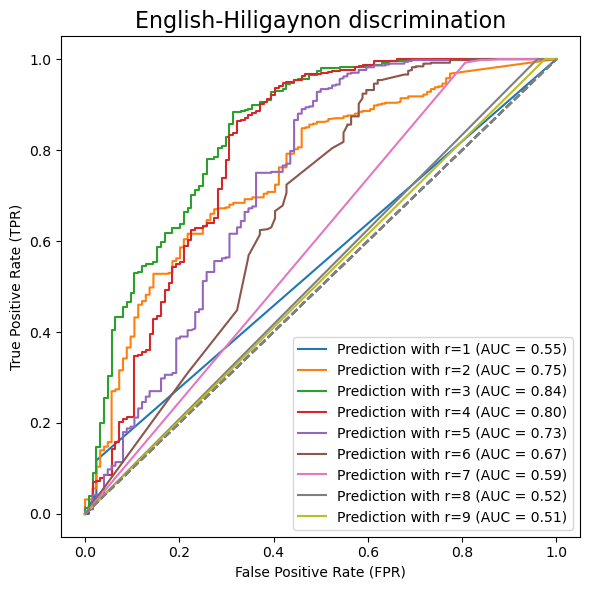

In [177]:
# Create subplots for 8 different ROC curves
fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots
axs = axs.ravel()  # Flatten the 2D array of axes to make it easier to index

# Loop through your files and plot ROC curves in subplots
for n in range(1, 10):
    labels, data = read_file(f"tests/test-english-hiligaynon-{n}.txt")  # Assuming you have a function to read the files
    roc(labels, data, fig, f'Prediction with r={n}', axs=False)  # Plot in the appropriate subplot

# Adjust layout for better spacing between subplots
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.title('English-Hiligaynon discrimination', fontsize=16)  # Title above the subplots
plt.tight_layout()
plt.savefig('figures/eng-hil.png')

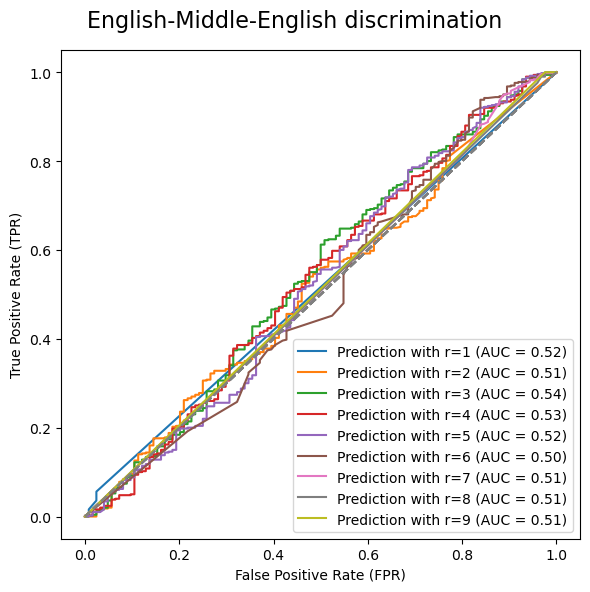

In [178]:
# Create subplots for 8 different ROC curves
fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots

# Loop through your files and plot ROC curves in subplots
for n in range(1, 10):
    labels, data = read_file(f"tests/test-english-middle-english-{n}.txt")  # Assuming you have a function to read the files
    roc(labels, data, fig, f'Prediction with r={n}',axs=False)  # Plot in the appropriate subplot

# Adjust layout for better spacing between subplots
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.suptitle('English-Middle-English discrimination', fontsize=16)  # Title above the subplots
plt.tight_layout()
plt.savefig('figures/eng-mid.png')

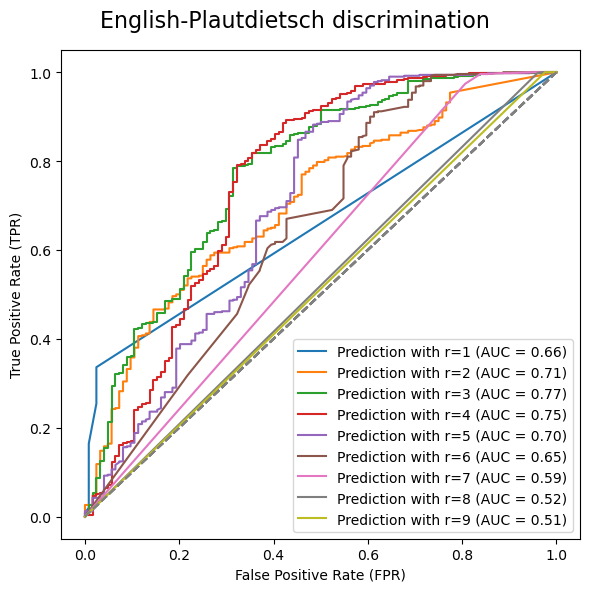

In [179]:
# Create subplots for 8 different ROC curves
fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots

# Loop through your files and plot ROC curves in subplots
for n in range(1, 10):
    labels, data = read_file(f"tests/test-english-plautdietsch-{n}.txt")  # Assuming you have a function to read the files
    roc(labels, data, fig, f'Prediction with r={n}', axs=False)  # Plot in the appropriate subplot

# Adjust layout for better spacing between subplots
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.suptitle('English-Plautdietsch discrimination', fontsize=16)  # Title above the subplots
plt.tight_layout()
plt.savefig('figures/eng-die.png')

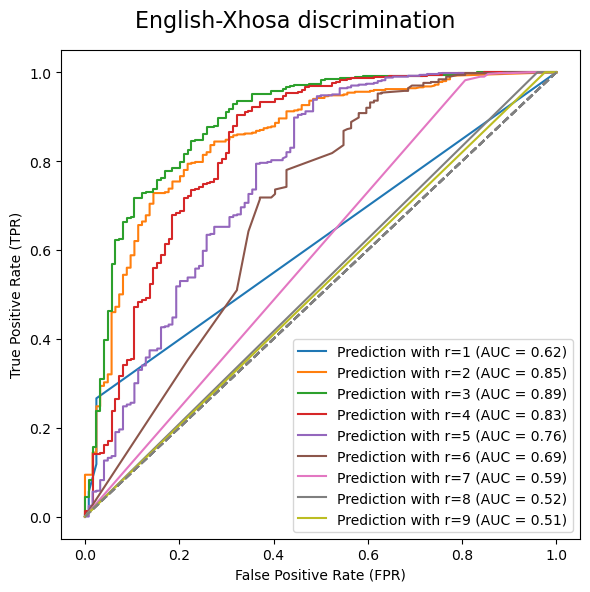

In [180]:
# Create subplots for 8 different ROC curves
fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots

# Loop through your files and plot ROC curves in subplots
for n in range(1, 10):
    labels, data = read_file(f"tests/test-english-xhosa-{n}.txt")  # Assuming you have a function to read the files
    roc(labels, data, fig, f'Prediction with r={n}', axs=False)  # Plot in the appropriate subplot

# Adjust layout for better spacing between subplots
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.suptitle('English-Xhosa discrimination', fontsize=16)  # Title above the subplots
plt.tight_layout()
plt.savefig('figures/eng-xho.png')

In [9]:
def chunk_sequence(sequence, chunk_length=10, overlap=False, step=1, padding_value='N'):
    """
    Split a sequence into fixed-length chunks. 
    If overlap is True, it will create overlapping chunks.
    If the sequence is shorter than the chunk length, it will pad with padding_value.
    """
    chunks = []
    
    # If the sequence is shorter than the chunk length, pad it
    if len(sequence) < chunk_length:
        sequence = sequence + (padding_value * (chunk_length - len(sequence)))

    if overlap:
        # Create overlapping chunks
        for i in range(0, len(sequence) - chunk_length + 1, step):
            chunks.append(sequence[i:i+chunk_length])
        # Ensure the last chunk is padded if necessary
        if len(sequence) % chunk_length != 0:
            chunks.append(sequence[-chunk_length:])
    else:
        # Create non-overlapping chunks
        for i in range(0, len(sequence), chunk_length):
            chunk = sequence[i:i+chunk_length]
            # Pad the last chunk if it is shorter than chunk_length
            if len(chunk) < chunk_length:
                chunk = chunk + (padding_value * (chunk_length - len(chunk)))
            chunks.append(chunk)

    return chunks

In [10]:
# Example usage
sequence = "ACGTACGTACGTAGCTAGCTAGCTA"  # Some sequence

# For non-overlapping chunks
chunks = chunk_sequence(sequence, chunk_length=10, overlap=False)
print("Non-overlapping chunks:", chunks)


Non-overlapping chunks: ['ACGTACGTAC', 'GTAGCTAGCT', 'AGCTANNNNN']


In [11]:
# Assuming data is a list of strings, for example:
data = [
    'apple',
    'banana',
    'orange',
    'apple',
    'grape',
    'banana',
    'kiwi',
    'orange'
]

# Use a set to get unique items
unique_items = set(data)

# Get the number of unique items
num_unique_items = len(unique_items)

# Print the number of unique items
print(f"Number of unique items: {num_unique_items}")


Number of unique items: 5


In [186]:
import itertools


# For overlapping chunks
def generate_training_data(file, chunk_length=7, overlap=True, step=3):
    with open(f"syscalls/snd-{file}/snd-{file}.train") as f:
        data = list(itertools.chain(*map(lambda x: chunk_sequence(x, chunk_length=chunk_length, overlap=overlap, step=step), f.read().splitlines())))
        x = set(data)
        print(len(x), len(data))
    
    with open(f"syscalls/snd-{file}/formatted/snd-{file}-n{chunk_length}-o{overlap}-s{step}.train", "w") as outfile:
        for line in x:
                outfile.write(f"{line}\n")  # Write each chunk as a new line in the output file
                
n=7
generate_training_data("cert", chunk_length=n, overlap=True, step=5)
generate_training_data("unm", chunk_length=n, overlap=True, step=5)

245 141187
508 183504


In [112]:
def match_data_to_index(data):
    # Step 1: Create a set of unique elements from data while preserving the order
    unique_data_set = list(dict.fromkeys(data))
    
    # Step 2: Create a mapping of each unique element to its index in the set
    data_to_index_mapping = {item: idx for idx, item in enumerate(unique_data_set)}
    
    # Step 3: For each element in data, get its index in the unique set
    data_indices = [data_to_index_mapping[item] for item in data]
    
    return data_indices, unique_data_set

In [187]:
# For overlapping chunks
def generate_test_data(file, chunk_length=7, type="cert"):
    with open(f"syscalls/snd-{type}/{file}.test") as f:
        with open(f"syscalls/snd-{type}/{file}.labels") as f1:
            in_data = f.read().splitlines()
            in_labels = f1.read().splitlines()
            comb = zip(in_data, in_labels)
            comb_chunks = list(itertools.chain(*map(lambda x: 
                    [(x[0],chunk, x[1][1]) for chunk in chunk_sequence(x[1][0], chunk_length=chunk_length, overlap=True, step=5)]
                     , enumerate(comb))))
            index, data, labels = zip(*comb_chunks)
            
            data_indices, unique_data_set = match_data_to_index(data)
            
    with open(f"syscalls/snd-{type}/formatted/{file}-n{chunk_length}.test", "w") as outfile:
        for line in unique_data_set:
                outfile.write(f"{line}\n")  # Write each chunk as a new line in the output file
    
    with open(f"syscalls/snd-{type}/formatted/{file}-n{chunk_length}.data-places", "w") as outfile:
        for line in data_indices:
                outfile.write(f"{line}\n")  # Write each chunk as a new line in the output file            
                
    with open(f"syscalls/snd-{type}/formatted/{file}-n{chunk_length}.data", "w") as outfile:
        for line in data:
                outfile.write(f"{line}\n")  # Write each chunk as a new line in the output file            
        
    with open(f"syscalls/snd-{type}/formatted/{file}-n{chunk_length}.labels", "w") as outfile:
        for line in labels:
                outfile.write(f"{line}\n")  # Write each chunk as a new line in the output file
                
    with open(f"syscalls/snd-{type}/formatted/{file}-n{chunk_length}.index", "w") as outfile:
        for line in index:
                outfile.write(f"{line}\n")  # Write each chunk as a new line in the output file
                


In [188]:

n = 7
for i in range(1,4):
    generate_test_data(f"snd-cert.{i}", chunk_length=n, type="cert")
    generate_test_data(f"snd-unm.{i}", chunk_length=n, type="unm")

In [ ]:
import pandas as pd

def read_test_file(filepath, type, v, n =10):
    with open(filepath) as f:
        dataset = list(
            map(lambda x: eval(x.strip()), f.read().splitlines())
            )
        with open(f"syscalls/snd-{type}/formatted/snd-{type}.{v}-n{n}.labels") as f1:
            labels = list(
                map(lambda x: eval(x.strip()), f1.read().splitlines())
                )
            with open(f"syscalls/snd-{type}/formatted/snd-{type}.{v}-n{n}.index") as f2:
                indexes = list(
                        map(lambda x: eval(x.strip()), f2.read().splitlines())
                    ) 
                with open(f"syscalls/snd-{type}/formatted/snd-{type}.{v}-n{n}.data-places") as f3:
                    data_places = list(
                        map(lambda x: eval(x.strip()), f3.read().splitlines())
                    ) 
                    
                    print(dataset, labels, indexes)
                    data = [dataset[x] for x in data_places]
                    df = pd.DataFrame({
                        'data': data,
                        'labels': labels,
                        'index': indexes
                    })

                    # Group by 'index', take the maximum of 'data' and pick any label (first in the group)
                    result = df.groupby('index').agg({
                        'data': 'mean',  # Get the maximum value of 'data'
                        'labels': 'last'  # Pick the first label in the group
                    })
                    # Convert the result back to a list of tuples
                    result_tuples = list(zip(result['data'], result['labels']))

    return zip(*result_tuples)
        

In [196]:
with open("syscalls/snd-cert/tests/test-syscall-explicit-snd-cert.1-n10-4.txt") as f:
    stuff = list(
        map(lambda x: eval(x.strip()), f.read().splitlines())
        )
print(stuff)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35.80489152098547, 36.3942285458913, 0.0, 0.0, 36.81807012865986, 36.818060325041, 0.0, 35.80489152098547, 36.3942285458913, 0.0, 0.0, 35.80489152098547, 36.3942285458913, 0.0, 0.0, 35.80489152098547, 36.39422

In [201]:
l,d = read_test_file(f"syscalls/snd-cert/tests/test-syscall-snd-cert.1-n7-4.txt","cert", 1, n=7)
d

(0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1)

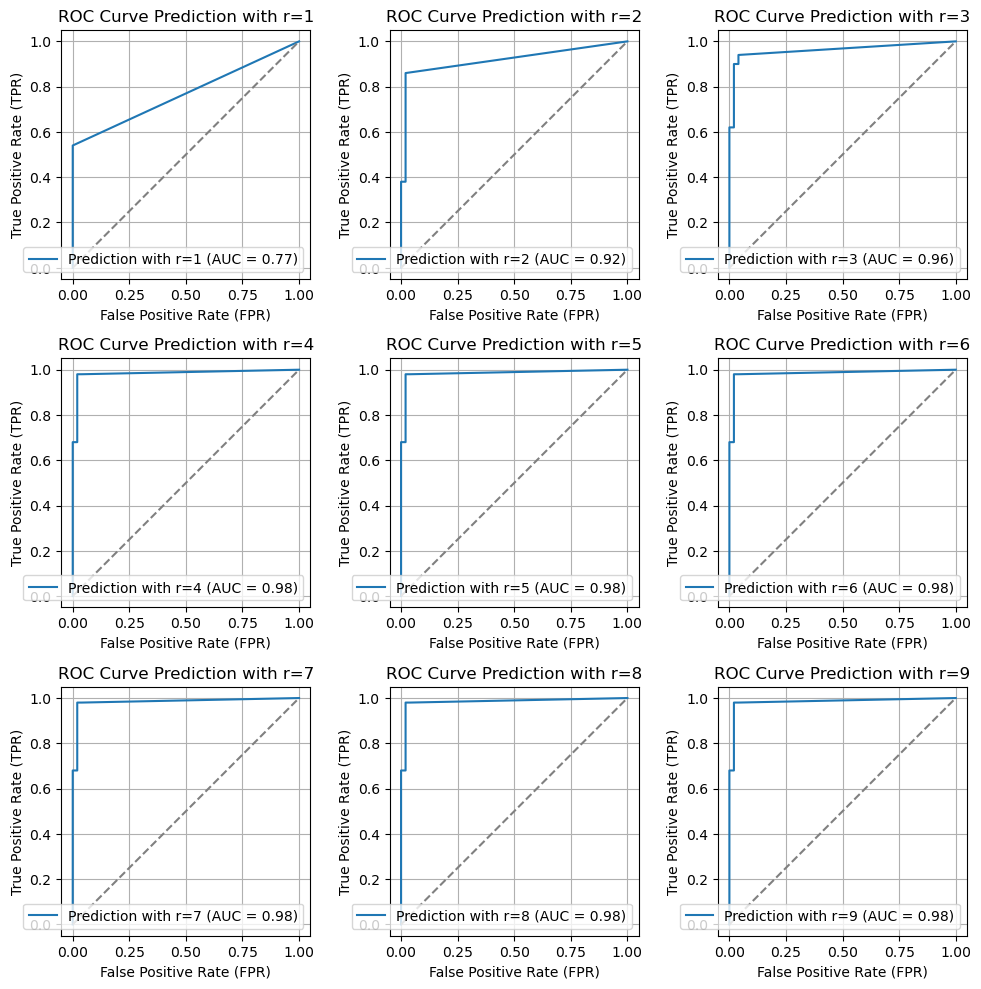

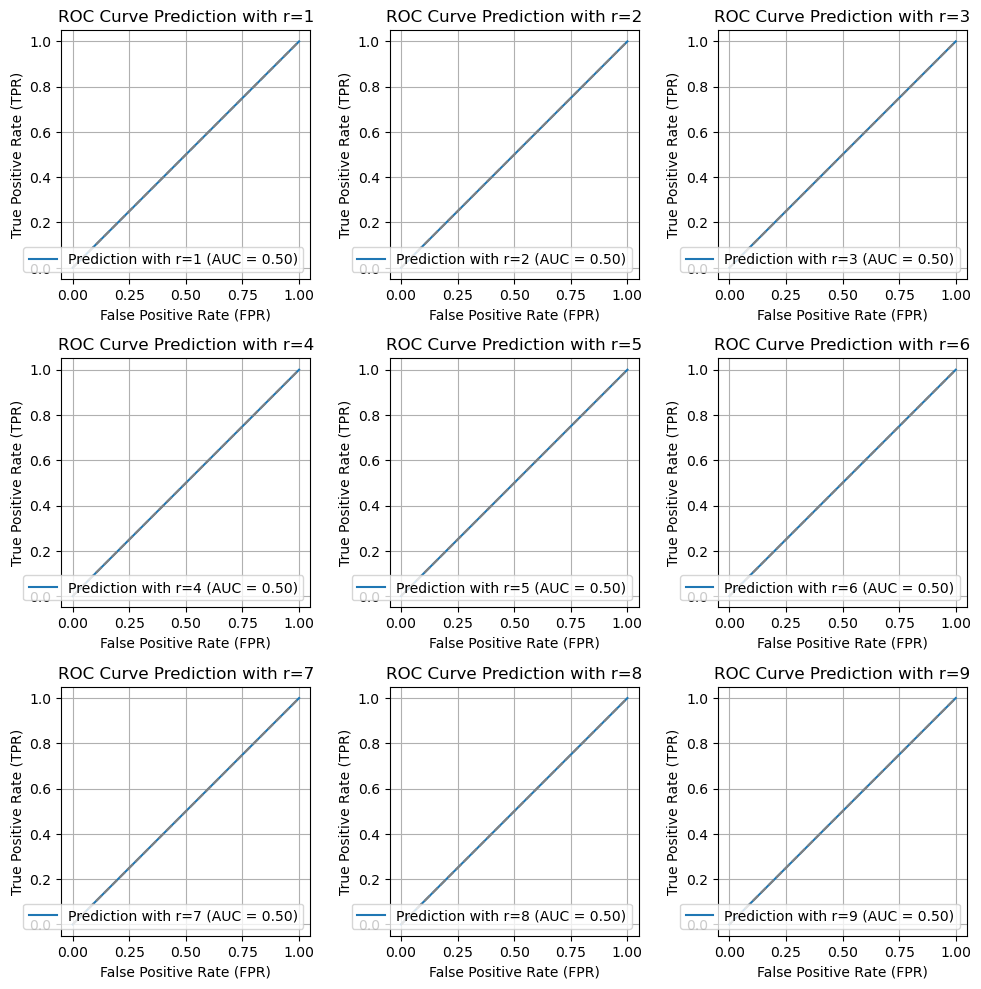

In [ ]:
for i in range(1,4):
    # Create subplots for 8 different ROC curves
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))  # 4 rows, 2 columns for 8 subplots
    axs = axs.ravel()  # Flatten the 2D array of axes to make it easier to index
    # Loop through your files and plot ROC curves in subplots
    for n in range(1, 10):
        labels, data = read_test_file(f"syscalls/snd-cert/tests/test-syscall-snd-cert.{i}-n10-{n}.txt","cert", i) # Assuming you have a function to read the files
        roc(labels, data, axs[n-1], f'Prediction with r={n}')  # Plot in the appropriate subplot

    # Adjust layout for better spacing between subplots
    plt.tight_layout()
    plt.show()
    
for i in range(1,4):
    # Create subplots for 8 different ROC curves
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))  # 4 rows, 2 columns for 8 subplots
    axs = axs.ravel()  # Flatten the 2D array of axes to make it easier to index
    # Loop through your files and plot ROC curves in subplots
    for n in range(1, 10):
        labels, data = read_test_file(f"syscalls/snd-unm/tests/test-syscall-snd-unm.{i}-n10-{n}.txt","unm", i) # Assuming you have a function to read the files
        roc(labels, data, axs[n-1], f'Prediction with r={n}')  # Plot in the appropriate subplot

    # Adjust layout for better spacing between subplots
    plt.tight_layout()
    plt.show()

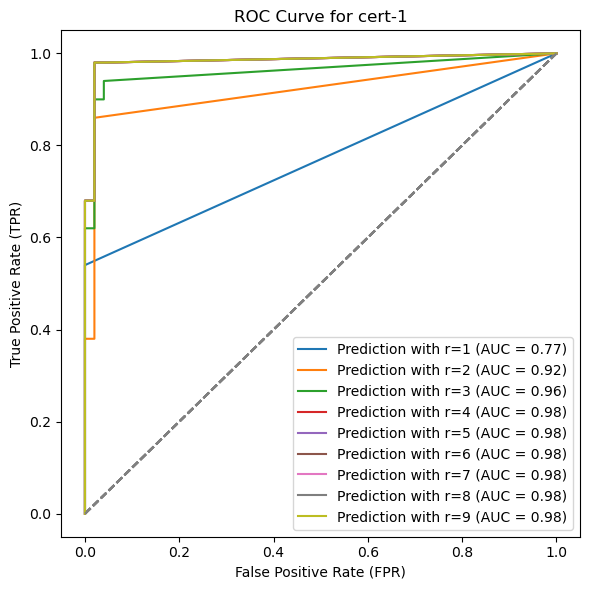

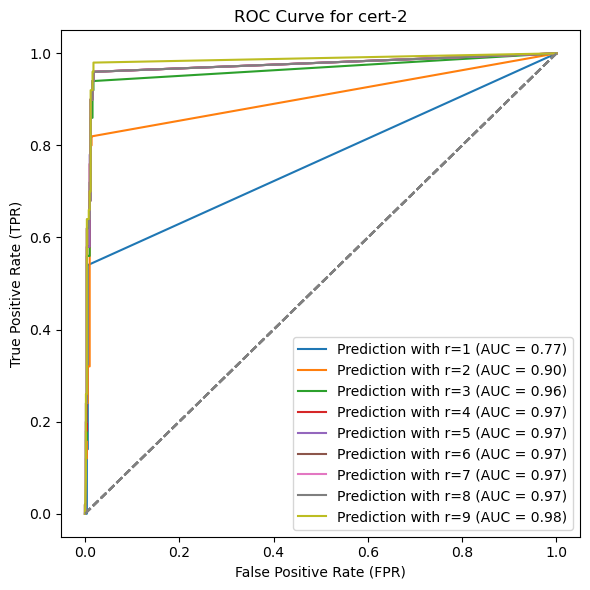

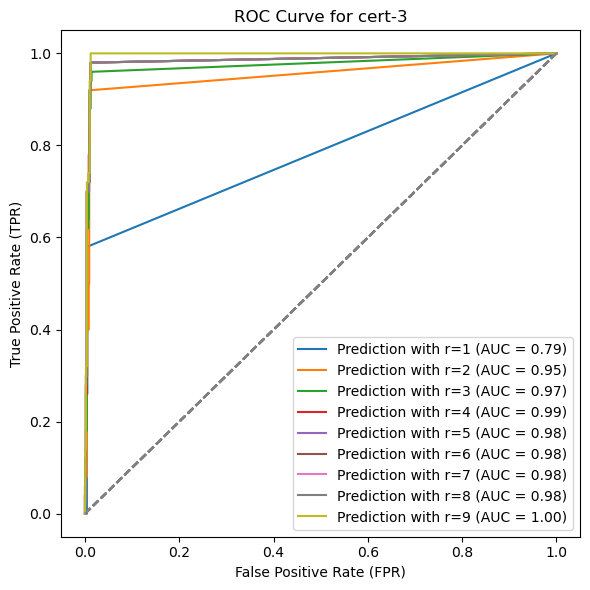

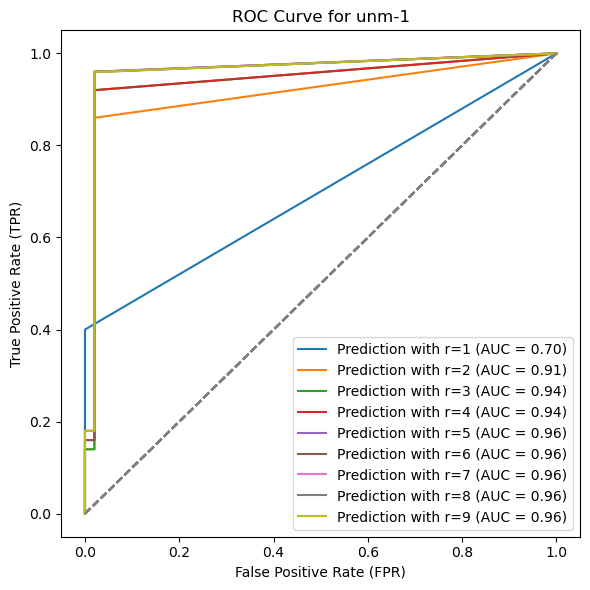

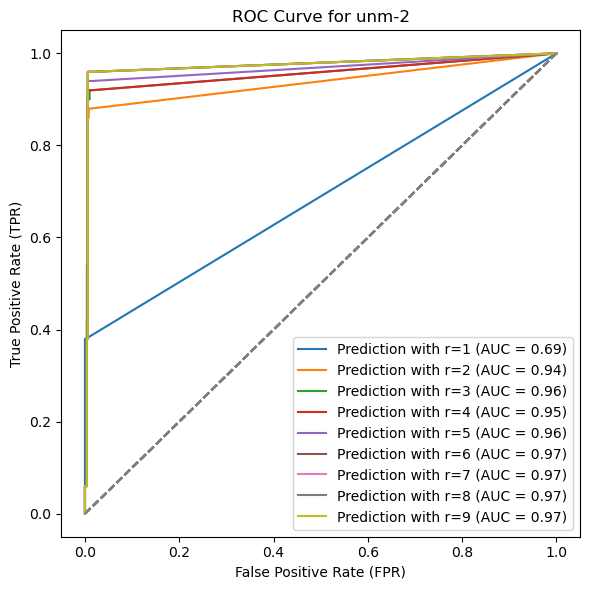

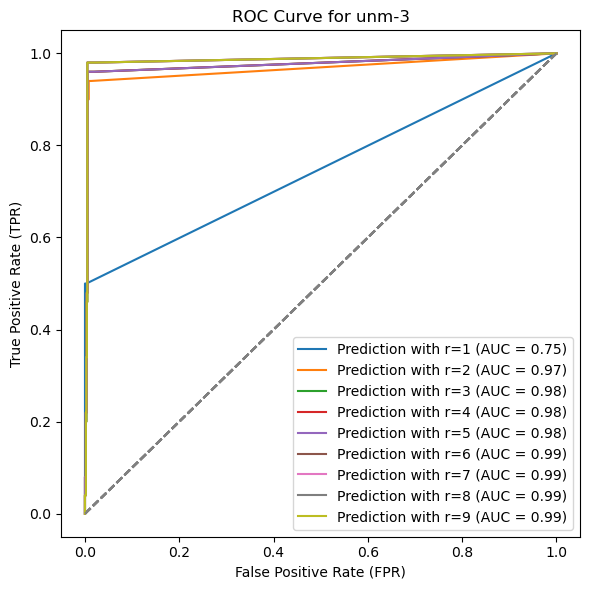

In [181]:
for i in range(1,4):
    # Create subplots for 8 different ROC curves
    fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots
    # Loop through your files and plot ROC curves in subplots
    for n in range(1, 10):
        labels, data = read_test_file(f"syscalls/snd-cert/tests/test-syscall-snd-cert.{i}-n10-{n}.txt","cert", i) # Assuming you have a function to read the files
        roc(labels, data, fig, f'Prediction with r={n}', axs=False)  # Plot in the appropriate subplot

    # Adjust layout for better spacing between subplots
    
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for cert-{i}')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig(f'figures/cert-{i}')
    
for i in range(1,4):
    # Create subplots for 8 different ROC curves
    fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots
    # Loop through your files and plot ROC curves in subplots
    for n in range(1, 10):
        labels, data = read_test_file(f"syscalls/snd-unm/tests/test-syscall-snd-unm.{i}-n10-{n}.txt","unm", i) # Assuming you have a function to read the files
        roc(labels, data, fig, f'Prediction with r={n}', axs=False)  # Plot in the appropriate subplot

    # Adjust layout for better spacing between subplots
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for unm-{i}')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig(f'figures/unm-{i}')

KeyboardInterrupt: 

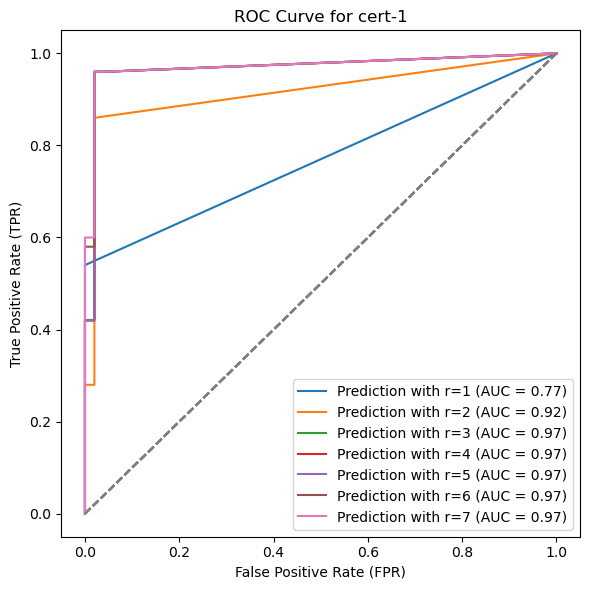

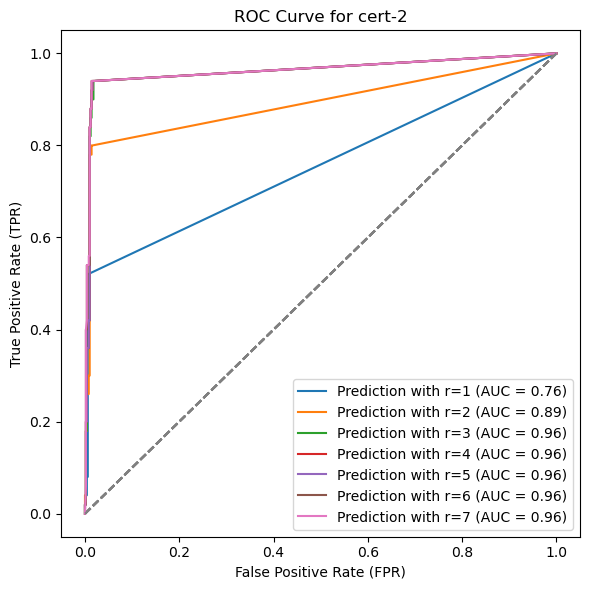

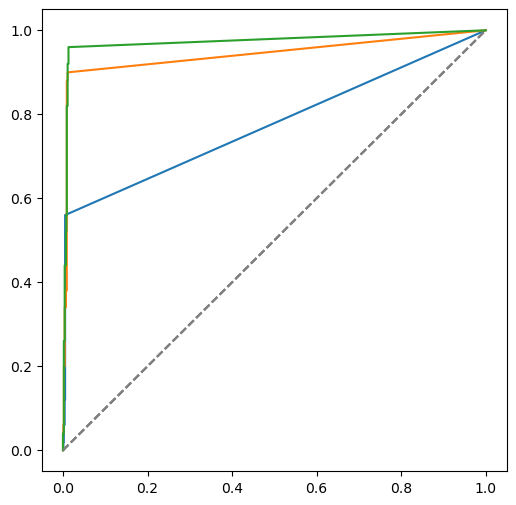

In [ ]:
for i in range(1,4):
    # Create subplots for 8 different ROC curves
    fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots
    # Loop through your files and plot ROC curves in subplots
    for n in range(1, 8):
        labels, data = read_test_file(f"syscalls/snd-cert/tests/test-syscall-snd-cert.{i}-n7-{n}.txt","cert", i, n=7) # Assuming you have a function to read the files
        roc(labels, data, fig, f'Prediction with r={n}', axs=False)  # Plot in the appropriate subplot

    # Adjust layout for better spacing between subplots
    
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for cert-{i}')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig(f'figures/cert7-{i}')
    
for i in range(1,4):
    # Create subplots for 8 different ROC curves
    fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots
    # Loop through your files and plot ROC curves in subplots
    for n in range(1, 8):
        labels, data = read_test_file(f"syscalls/snd-unm/tests/test-syscall-snd-unm.{i}-n7-{n}.txt","unm", i, n=7) # Assuming you have a function to read the files
        roc(labels, data, fig, f'Prediction with r={n}', axs=False)  # Plot in the appropriate subplot

    # Adjust layout for better spacing between subplots
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for unm-{i}')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig(f'figures/unm7-{i}')

In [131]:
import pandas as pd

def read_test_file2(filepath, type, v):
    with open(filepath) as f:
        data = list(
            map(lambda x: eval(x.strip()), f.read().splitlines())
            )
        with open(f"syscalls/snd-{type}/formatted/snd-{type}.{v}-n10.labels") as f1:
            labels = list(
                map(lambda x: eval(x.strip()), f1.read().splitlines())
                )
            with open(f"syscalls/snd-{type}/formatted/snd-{type}.{v}-n10.index") as f2:
                indexes = list(
                        map(lambda x: eval(x.strip()), f2.read().splitlines())
                    ) 

                print(len(data), len(labels), len(indexes))
                df = pd.DataFrame({
                    'data': data,
                    'labels': labels,
                    'index': indexes
                })

                # Group by 'index', take the maximum of 'data' and pick any label (first in the group)
                result = df.groupby('index').agg({
                    'data': 'mean',  # Get the maximum value of 'data'
                    'labels': 'last'  # Pick the first label in the group
                }).reset_index()
                # Convert the result back to a list of tuples
                result_tuples = list(zip(result['data'], result['labels']))

        
    return zip(*result_tuples)

9148 9148 9148
9148 9148 9148
9148 9148 9148
9148 9148 9148
9148 9148 9148
9148 9148 9148
9148 9148 9148
9148 9148 9148
9148 9148 9148


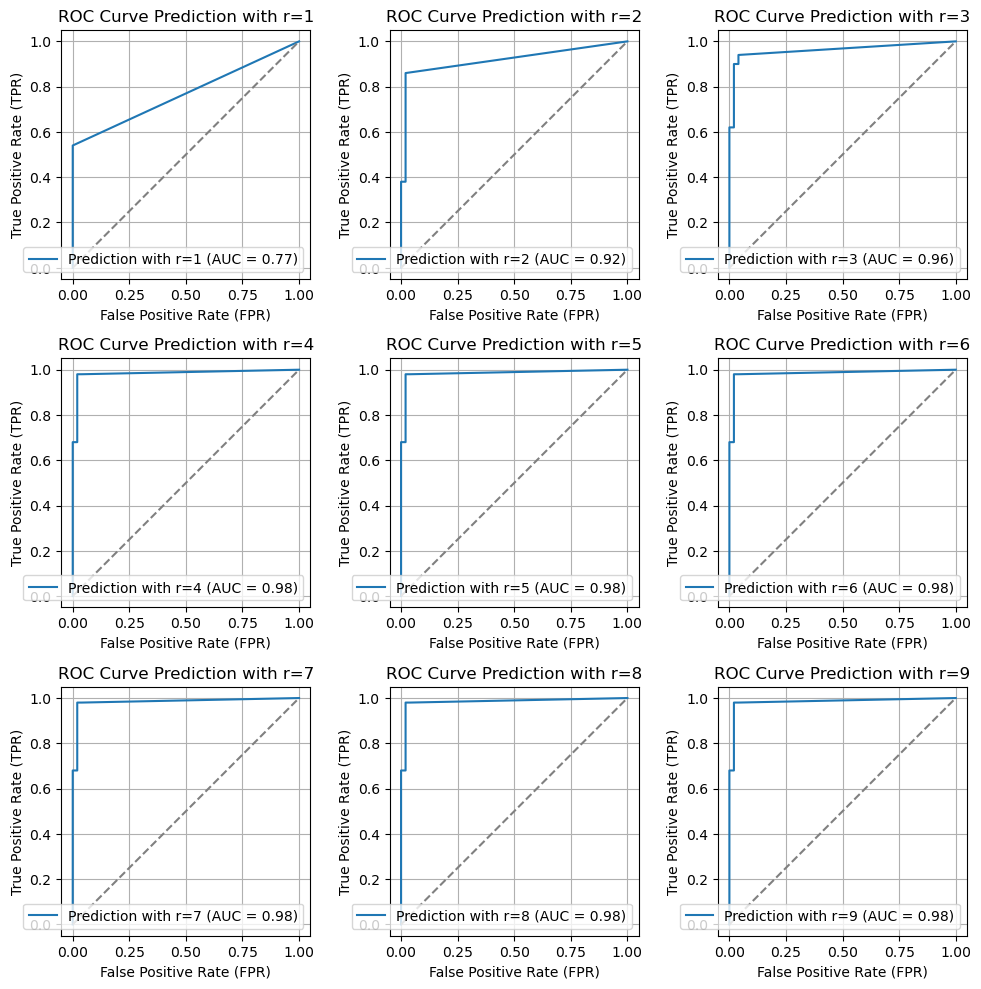

In [143]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))  # 4 rows, 2 columns for 8 subplots
axs = axs.ravel()  # Flatten the 2D array of axes to make it easier to index
# Loop through your files and plot ROC curves in subplots
for n in range(1, 10):
    labels, data = read_test_file2(f"syscalls/snd-cert/tests/test-syscall-explicit-snd-cert.1-n10-{n}.txt","cert", 1) # Assuming you have a function to read the files
    roc(labels, data, axs[n-1], f'Prediction with r={n}')  # Plot in the appropriate subplot

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()